In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

In [2]:
runs = 1000

In [3]:
probs = np.linspace(0.1, 0.9, 33)

In [4]:
samples_sizes = [16, 32, 64]

In [5]:
alpha = 0.05

In [6]:
plt.style.use('seaborn-white')

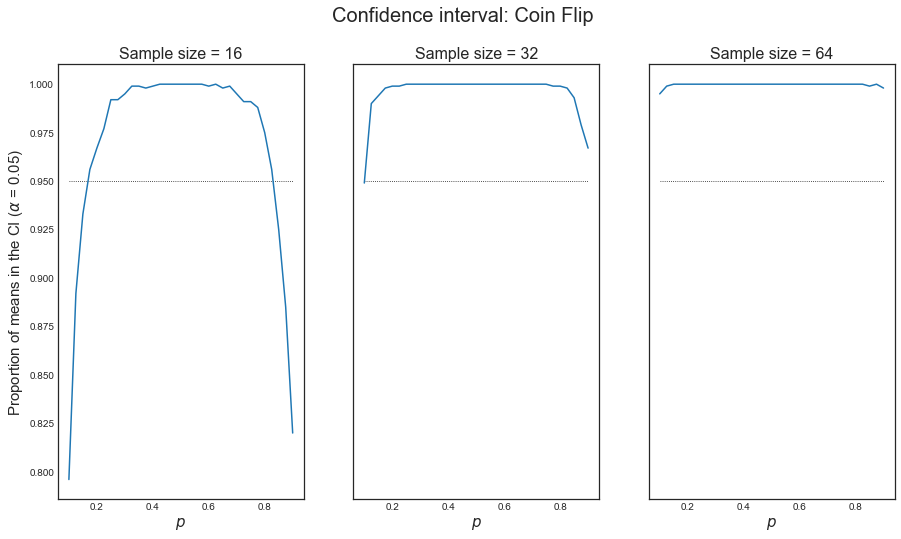

In [11]:
fig, ax = plt.subplots(ncols=len(samples_sizes), figsize=(15,8), sharey=True)

fig.suptitle('Confidence interval: Coin Flip', fontsize=20)
ax[0].set_ylabel(r'Proportion of means in the CI ($\alpha$ = {:.2f})'.format(alpha), fontsize=15)

for i, sample_size in enumerate(samples_sizes):
    phats = np.array([np.random.choice([0, 1], p=[1-prob, prob], size=(sample_size,runs)).mean(axis=0) for prob in probs])

    lo_lims = phats - norm.ppf(1-alpha/2.) * np.sqrt(phats*(1-phats)/sample_size)
    hi_lims = phats + norm.ppf(1-alpha/2.) * np.sqrt(phats*(1-phats)/sample_size)

    props = np.mean((phats > lo_lims) & (phats < hi_lims), axis=1)

    ax[i].set_title('Sample size = {}'.format(sample_size), fontsize=16)
    ax[i].plot(probs, props)
    ax[i].hlines(y=1-alpha, xmin=probs[0], xmax=probs[-1], linestyle='dotted', linewidth=0.8)
    ax[i].set_xlabel('$p$', fontsize=15)

fig.savefig('confidence-intervals.png')